## Titantic Survival Rate Analysis

#### *Import Pandas, Numpy, and Visualization Libraries*

In [132]:
import pandas as pd
import numpy as np

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### *Create Training DataFrame*

In [134]:
train_df = pd.read_csv('titanic_train.csv')

#### *Quick Stats on the data*

In [135]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [136]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### *Missing Data?*

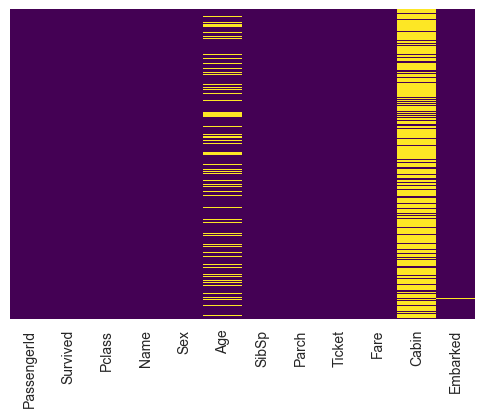

In [137]:
sns.heatmap(train_df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

#### *Some missing values in the Age Column and many missing values in the Cabin Column*

### *Exploratory data visualizations to have a better understanding of the data*

In [138]:
sns.set_style('whitegrid')

#### *Male vs Female survival count*

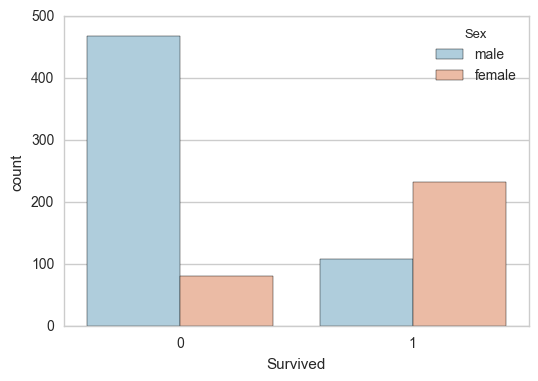

In [139]:
sns.countplot(data=train_df,x='Survived',hue='Sex',palette='RdBu_r')

#### *By Passenger Class survival count*

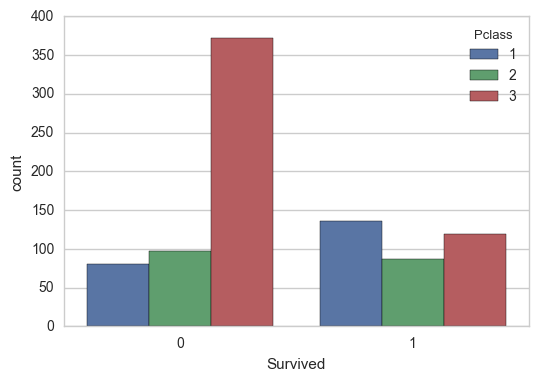

In [140]:
sns.countplot(data=train_df,x='Survived',hue='Pclass')

#### Age distribution of passengers

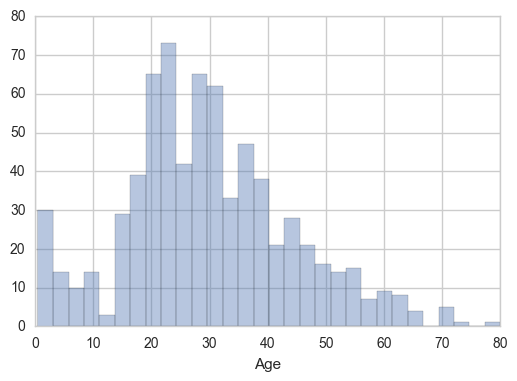

In [141]:
sns.distplot(train_df['Age'].dropna(),kde=False,bins=30)

#### *Family members?*

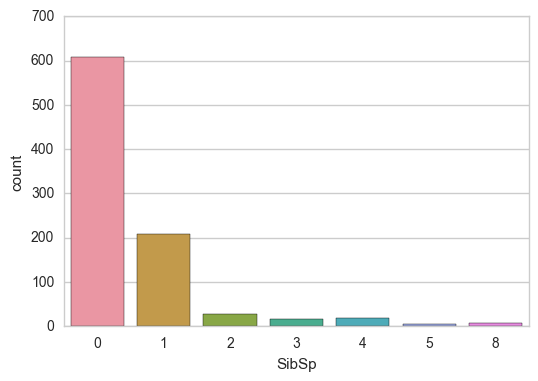

In [142]:
sns.countplot(data=train_df,x='SibSp')

#### *Fare Distribution*

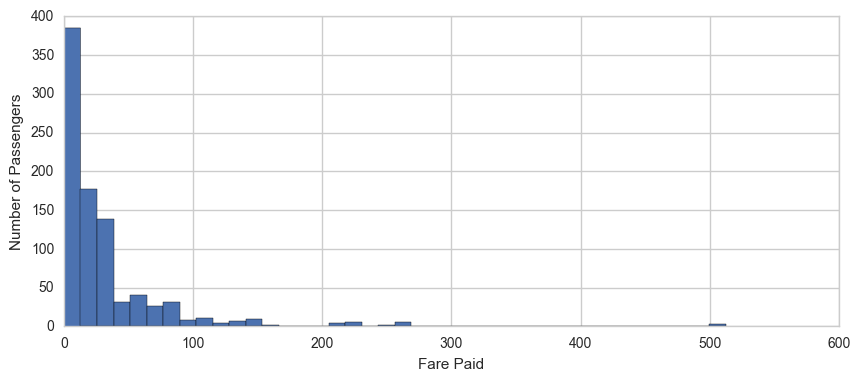

In [143]:
train_df['Fare'].hist(bins=40,figsize=(10,4))
plt.xlabel('Fare Paid')
plt.ylabel('Number of Passengers')

 ### *Time to remove missing data*

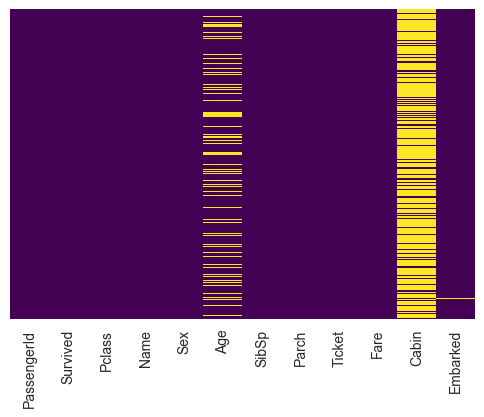

In [144]:
sns.heatmap(train_df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [145]:
pclass_1_mean_age = train_df.groupby(['Pclass']).mean().iloc[0]['Age']
pclass_2_mean_age = train_df.groupby(['Pclass']).mean().iloc[1]['Age']
pclass_3_mean_age = train_df.groupby(['Pclass']).mean().iloc[2]['Age']

In [146]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return pclass_1_mean_age
        elif Pclass == 2:
            return pclass_2_mean_age
        else:
            return pclass_3_mean_age
    else:
        return Age

In [147]:
train_df['Age'] = train_df[['Age','Pclass']].apply(impute_age,axis=1)

#### *Fill in missing age, with appropriate mean per Pclass*

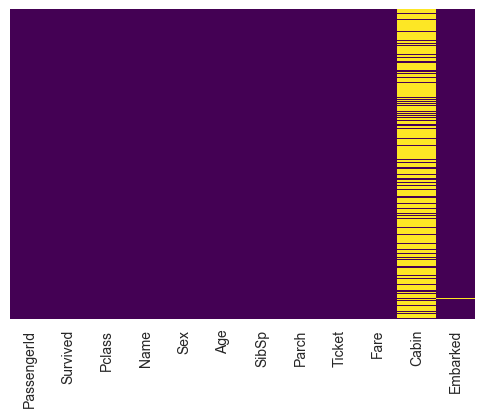

In [148]:
sns.heatmap(train_df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

#### *Let's drop the Cabin column*

In [149]:
train_df.drop('Cabin',axis=1,inplace=True)

In [151]:
train_df.dropna(inplace=True)

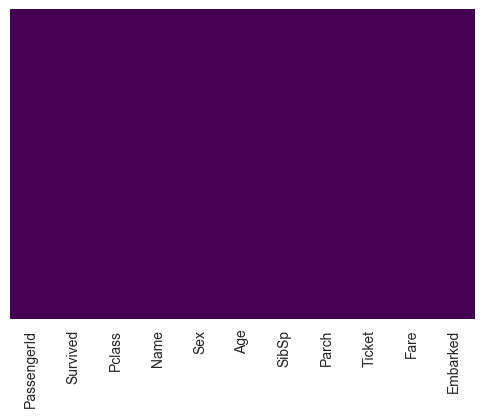

In [152]:
sns.heatmap(train_df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

#### *Yay! much better looking*

#### *Creating dummy variables for non-numeric features and drop non-relevant columns*

In [153]:
sex = pd.get_dummies(train_df['Sex'],drop_first=True)

In [154]:
embark = pd.get_dummies(train_df['Embarked'],drop_first=True)

In [156]:
train_df = pd.concat([train_df,sex,embark],axis=1)

In [158]:
train_df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [159]:
train_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [160]:
train_df.drop('PassengerId',axis=1,inplace=True)

In [161]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### *Time to train our model*

In [397]:
y = train_df['Survived'].copy()

In [398]:
X = train_df.drop('Survived',axis=1)

In [399]:
from sklearn.model_selection import train_test_split

In [400]:
 X_train, X_test, y_train, y_test = train_test_split(X,
                                                     y,
                                                     test_size=0.3,
                                                     random_state=101)

In [401]:
from sklearn.linear_model import LogisticRegression

In [402]:
logmodel = LogisticRegression()

In [403]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [404]:
predicitions = logmodel.predict(X_test)

### *Time to evaluate our model*

In [405]:
from sklearn.metrics import classification_report

In [406]:
print(classification_report(y_test,predicitions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



#### Fooling around seeing predictions

In [407]:
from collections import OrderedDict

In [408]:
train_df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [418]:
d = OrderedDict({'Pclass': 1,
                 'Age': 5,
                 'SibSp': 0,
                 'Parch': 0,
                 'Fare' : 51,
                 'male': 1,
                 'Q': 1,
                 'S': 0
                })

In [419]:
fake_df = pd.DataFrame(d,index=[0])

In [420]:
print(logmodel.predict_proba(fake_df))

[[ 0.96281423  0.03718577]]
